# Importing Libraries

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import emoji

In [136]:
# Reading and storing USA commenets dataset in the dataframe video.
videos = pd.read_csv("I:\My Drive\Projects\youtube_text_data_analysis/UScomments.csv", error_bad_lines= False)
videos.head()
#videos.describe()

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\SCHOOL\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning:

Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.



,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


# Perform Sentiment analysis onutube data

## textblob library
1. textblob package is downloaded
2. Import TextBlob class from the library to perform the sentiment analysis
3. call sentiments and polarity attributes of class TextBlob to check the polarity of sentiment. 
4. 1 indicates highly positive sentiment while -1 indicates highly neagtive sentiment. o indicates neutral sentiment.


In [137]:
!pip install textblob # This library is used for the sentiment analysis

ERROR: Invalid requirement: '#'


In [138]:
from textblob import TextBlob # Importing TextBlob class from textblob class to perform sentiment analysis

In [139]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity

0.0

In [140]:
# polarity = [TextBlob(i).sentiment.polarity for i in videos['comment_text']]

polarity =[]
for i in videos["comment_text"]:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0) 
    

In [141]:
# Adding the polarity of comments of each observation in the dataframe.
videos["polarity"] = polarity
videos.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


## Performing EDA on text data
Using the wordcloud 

In [142]:
!pip install wordcloud

In [143]:
from wordcloud import WordCloud, STOPWORDS # (is, am, I, the, tem, there, etc can be ignored using the stopwords)

## Performing Positive Sentiment Analysis using WordCloud

In [144]:
# Filtering the observations for which comments represents a positive sentiments

comments_positive_sentiments = videos[videos["polarity"] == 1]

In [145]:
comments_positive_sentiments.head(5)

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


In [146]:
# Joining all the pasoitive comments from the dataframe in to a single comment line.

total_comments_positive = " ".join(comments_positive_sentiments["comment_text"])
total_comments_positive

"yu are the best Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. YAS Can't wait to get it! I just need to sell my kidney so I can afford iPhone X :D This is priceless Summed up perfectly This is awesome. 1:20 XDDDDDDDDD BEST MOVIE EVER!!! Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. The greatest movie about the greatest movie. It's Harry guys he's Spiderman best friend Best remake ever! Great review! awesome vlog Subscribe to me if Roman Atwood is the best youtuber I was attacked by a police dog once, \\n\\n\\n\\n\\n\\nthat was the best use of peanut butter ever. The best part of the movie was the credits DO THE ORIGINAL STEPHEN KING'S IT!!!!!!!!!!!!!! 🤣🤣🤣🤣😃😃😃😃 i downloaded and saw The Mummy 2017  in the best quality guys. here's the Iink https://twitter.com/akewdiudri/status/907980087676477442\\nyou must see too guys! that was awesome. 

In [147]:
# Creting wordcloud ocject
wordcloud = WordCloud(width = 1000, height = 500, stopwords = set(STOPWORDS)).generate(total_comments_positive)

(-0.5, 999.5, 499.5, -0.5)

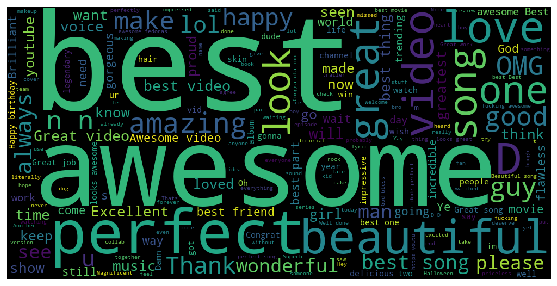

In [148]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

## Performing Negative Sentiment Analysis using WordCloud

In [149]:
comments_negative_sentiments = videos[videos["polarity"] == -1]

In [150]:
comments_negative_sentiments.head(5)

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0


In [151]:
total_comments_negative = " ".join(comments_negative_sentiments["comment_text"]);
# total_comments_negative

(-0.5, 999.5, 499.5, -0.5)

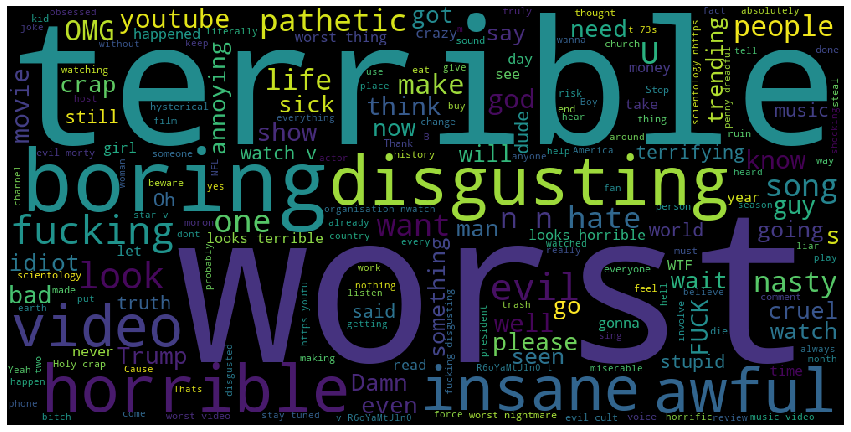

In [152]:
wordcloud =  WordCloud(width = 1000, height =500, stopwords = set(STOPWORDS)).generate(total_comments_negative)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud)
plt.axis("off")

# Analyzing Tags colums, what are the trending tags on youtube.

In [153]:
videos2 = pd.read_csv("I:\My Drive\Projects\youtube_text_data_analysis/USvideos.csv", error_bad_lines= False)
videos2.head(5)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


#### Fetching tag data from the dataframe and cleaning 

In [154]:
tags_complete = " ".join(videos2["tags"])

In [155]:
import re # library for text manipulation regular expression

In [156]:
# call sub() of the re package for substituting | with  " "

tags = re.sub('[^a-zA-z]', ' ', tags_complete);

In [157]:
# replacing more than one space with a single space

tags = re.sub('\s+', " ", tags); # \s+ looks for atleast one space in the string and replaces it with single space.

#### Creating wordcloud from tags to get the trending tags on youtube

(-0.5, 999.5, 499.5, -0.5)

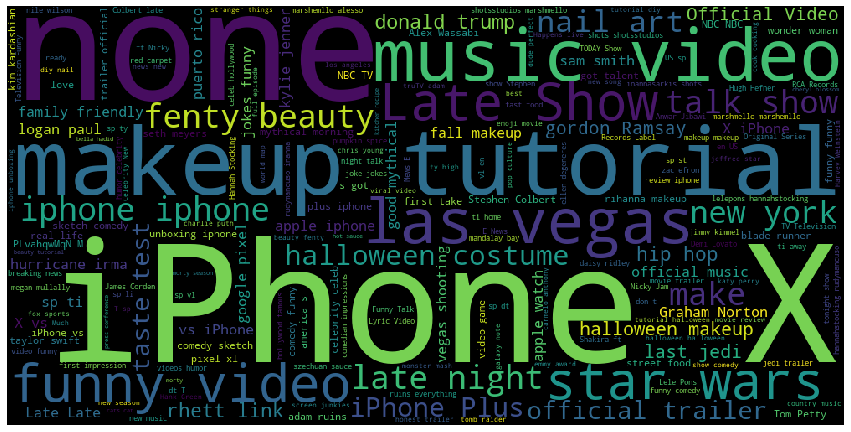

In [158]:
# Creatinga and generating a wordcloud Image.
wordcloud = WordCloud(width = 1000, height = 500, stopwords = set (STOPWORDS)).generate(tags) 

# displaying the generated image
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')

# Analyzing likes, dislikes & views, and finding how they are coreelated with each other.

In [159]:
videos2.head(5)

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


#### Likes vs Views

Text(0.5, 1.0, 'Regression plot of Likes Vs Views for videos on youtube')

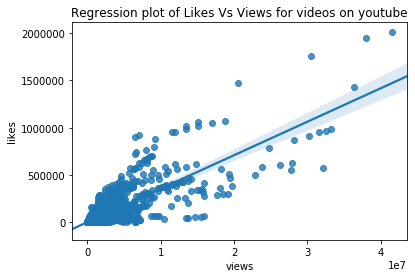

In [160]:
sns.regplot(data = videos2, x = 'views', y = 'likes')
plt.title("Regression plot of Likes Vs Views for videos on youtube")

From the plot I can see the like and views are positively correlated and I can say that there are higher chances of getting more likes with increading number of views on aparticular videos.

#### Dislikes Vs View

Text(0.5, 1.0, 'Regression plot of Dislikes Vs Views for videos on youtube')

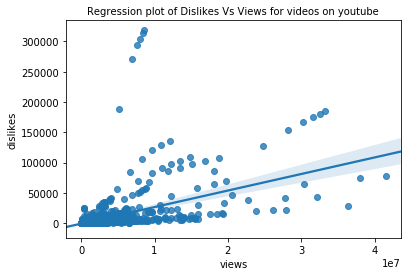

In [161]:
sns.regplot(data = videos2, x = 'views', y = 'dislikes')
plt.title("Regression plot of Dislikes Vs Views for videos on youtube", size = 10)

It shows that with increasing views of a video on youtube dislikes are increasing as well but at a much lower rate.

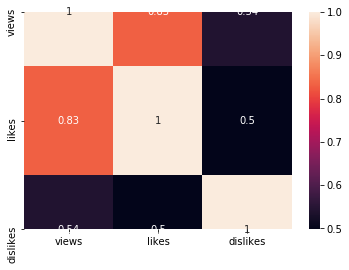

In [162]:
# Checking correlation between views, likes and dislikes.

df_corr = videos2[['views', 'likes', 'dislikes']]
sns.heatmap(df_corr.corr(), annot = True)

# Analyzing Emoji's in comment's

In [163]:
videos.head(5)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


In [164]:
!pip install emoji

In [165]:
# Checking for missinig values in the comment_text column of the dataframe and removing the rows having no comments
videos[videos['comment_text'].isna() == True]
videos.dropna(axis = 0, inplace = True) # removing the rows having NA and updating the videos dataframe

In [166]:
len(videos['comment_text'])

691375

In [167]:
'\U0001F601' # Unicode for a particular emoji

'😁'

In [168]:
# Extracting an emoji present in a comment
comment = videos['comment_text'][4]
[c for c in comment if c in emoji.UNICODE_EMOJI]

['😉']

In [169]:
# Extracting emoji's present in the comments for each video and storing it in a string.
emjstr = " "
for comment in videos['comment_text']:
    emjlist = [e for e in comment if e in emoji.UNICODE_EMOJI] # cheking id emoji is present is a particular comment
    for str in emjlist:
        emjstr = emjstr+str
        

In [170]:
emjstr;

In [171]:
len(emjstr) # total numner of emojis used across all comments for all the videos

304746

In [172]:
len(set(emjstr)) # total number of unique comments used.

1124

In [173]:
emjstr.count('\U0001F600')

1734

In [174]:
# Storing the frequency counts for each emoji in a dictionary.
# dict_variable = {key:value for (key,value) in dictonary.items()}

emjdict  = {e : emjstr.count(e) for e in set(emjstr)}

In [175]:
# Sorting emoji dictionary created based on the number of times each emoji was repeated(value) in the comments
# sorted(emjdict.items(), key = lambda item:item[1])

emjdict = {k:v for k, v in sorted(emjdict.items(), key = lambda item:item[1])}

In [176]:
# Extracting keys from the dictionary emjdict

#list(emjdict)
# list(emjdict.keys())

keys = [*emjdict.keys()]; # Using unpacking operator * to convert the dict view object into a list.
values = [*emjdict.values()]; # extracting value and converting it into a list.

In [177]:
# creating a datframe with emoji's and their counts for all video comments on youtube.
# Top 30 most frequently used emojis in the dataframe.

emjdf = pd.DataFrame({'emoji' : keys[-30:], 'frequency' : values[-30:]})

In [178]:
emjdf

,emoji,frequency
0,🤔,1592
1,🏽,1593
2,💛,1677
3,😀,1734
4,🌍,1810
5,🙏,1818
6,😱,2094
7,💗,2144
8,😁,2220
9,🙌,2233


In [179]:
!pip install plotly

In [180]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [181]:
emjplot = go.Bar(x = emjdf['emoji'], y = emjdf['frequency'])
iplot([emjplot])

From the above plot I can see that the top 3 trendinh emojis on all the videos on youtube are positive one, suggetsting positive response from the users for those videos.